In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import string
import matplotlib.pyplot as plt
from numpy import NaN
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

plt.rcParams['font.family'] = 'Gulim'

num = 0
temp=[]
Number=[]
Title=[]
writer=[]
view=[]
#ordate=[]
date=[]
time=[]
page = 0
page_contents=[]


for i in range(1,30):
    res = urlopen('https://www.chungbuk.ac.kr/site/www/boardList.do?page='+str(i)+'&boardSeq=112&key=698')
    soup = BeautifulSoup(res, "html.parser")
    
    data = soup.find_all('td')[18:]
    for item in data:
        num += 1
        
        if(num % 6 == 1): Number.append(item.get_text().strip());
        if(num % 6 == 2): 
            Title.append(item.get_text().strip())
            pagelink = item.find('a')['href']
            page = urlopen("https://www.chungbuk.ac.kr/site/www/"+ pagelink)
            page_contents.append((BeautifulSoup(page,"html.parser").find("div",class_="brdcon").get_text()))
        if(num % 6 == 3): writer.append(item.get_text().strip());
        if(num % 6 == 5): view.append(item.get_text().strip());
        #if(num % 6 == 0): ordate.append(item.get_text().strip());
        if(num % 6 == 0): date.append(item.get_text().strip().replace(".",""));

In [5]:
today = datetime.now()
year= months = days = 0
time=[]

for i in range(len(date)):
    years=int((date[i])[0:4])
    months=int((date[i])[4:6])
    days=int((date[i])[6:8])
    
    dateinfo = datetime(years, months, days)
    time.append((today-dateinfo).days)

In [6]:
def check_01(text):
    for word in ["세미나","컨퍼런스","학회"]:
        if(text.find(word) != -1):
            return 1
    else:
        return 0
    
def check_02(text):
    for word in ["근로","월급","근무","고용","채용"]:
        if(text.find(word) != -1):
            return 1
    else:
        return 0
    
def check_03(text):
    for word in ["공모전","대회","컴퍼티션","컴페티션",'투표']:
        if(text.find(word) != -1):
            return 1
    else:
        return 0

def check_04(text):
    for word in ["상금","선착순","돈","상품권","상품"]:
        if(text.find(word) != -1):
            return 1
    else:
        return 0

seminar =[]
work = []
competition = []
money = []

for i in range(len(page_contents)):
    seminar.append(check_01(page_contents[i]))
    work.append(check_02(page_contents[i]))
    competition.append(check_03(page_contents[i]))
    money.append(check_04(page_contents[i]))
    #print(page_contents[i])
    
    ###test###
for i in range(len(competition)):
    if(competition[i] == 1):
        print("===========================")
        print(Number[i],page_contents[i])

13042 
2020 Hi-TECH 공학콘서트 개최 및 랜선투표 안내
  충북대학교 공학교육혁신센터는 국가산업을 리드하는 융합형 창의적 인재 양성을 위해 다양한 프로그램을 개발하고 운영하고 있습니다. 이에 한 해 동안 공학교육혁신센터에서 운영한 프로그램의 결과물을 선보이는 자리인 "2020 Hi-TECH 공학콘서트"를 개최합니다.   특히 이번 "2020 Hi-TECH 공학콘서트"는 코로나19에도 충북대학교 전체 구성원과 함께할 수 있는 자리를 마련하고자 온라인과 오프라인을 함께 운영합니다. 쉽지 않은 상황 속에서 많은 공학계열 학생들이 창의적인 아이디어를 도출하고 작품으로 구현한 결과물을 관람하여 주시고 따뜻한 응원과 격려부탁드립니다.
 
 ∎ 행사진행 내용



   구 분
         진행기간
       개최장소
               전시내용 
  참여방법 


 온라인
 2020.12.10.(목) ~ 14.(월) 오후 6시
          유튜브(채널명 : 충북대학교 공학교육혁신센터)
캡스톤디자인, 설계연구동아리, 창업동아리 작품 영상
 랜선투표


 오프라인
 2020.12.15.(화)
 개신문화관
캡스톤디자인, 설계연구동아리, 창업동아리 작품
 Hi-Pannel




※ 오프라인 자유관람이 아닌, 사전 관람 신청제로 운영됩니다.
 
 ∎ 참여대상 : 충북대학교 전체 구성원(교직원, 학생)
 ∎ 참여내용 : 2020 Hi-TECH 공학콘서트 전시 관람 및 투표
 ∎ 랜선 투표 방법 : 충북대학교 공학교육혁신센터 공지사항 참고   - 신청방법 : 공지사항 참고  http://eeic.chungbuk.ac.kr/ <-클릭   - 유튜브 : https://www.youtube.com/channel/UCkiAj_ADtOeszagr-HyIPBA※ 2020 Hi-TECH 공학콘서트 참가팀은 신청할 수 없습니다.※ 랜선투표에 참여한 분에게는 커피쿠폰이 지급됩니다(선착순 100명).

13039 
코로나19 펜데믹 감염이 지속됨에 따라 비대면 방식의 

In [7]:
Notice = pd.DataFrame()
Notice["Number"] = Number
Notice["Title"] = Title
Notice["writer"] = writer
Notice["view"] = list(map(float,view))
Notice["date"] = list(map(float,date))
Notice["old"] = list(map(float,time))
Notice["seminar"] = seminar
Notice["work"] = work
Notice["competition"] = competition
Notice["money"] = money

In [8]:
Notice.to_csv("Noticefile.csv", index=False)
Notice

,Number,Title,writer,view,date,old,seminar,work,competition,money
0,13043,2020년도 체육진흥원 근로장학생 선발안내,체육진흥원,104.0,20201210.0,0.0,0,1,0,0
1,13042,2020 Hi-TECH 공학콘서트 개최 및 랜선투표 안내,공학교육혁신센터,108.0,20201210.0,0.0,0,0,1,1
2,13041,2020학년도 영어/스페인어 동영상강의 강사채용 공고,국제교류본부,66.0,20201210.0,0.0,0,1,0,0
3,13040,2021학년도 대학 편입학 모집요강 공지,입학과,410.0,20201209.0,1.0,0,0,0,0
4,13039,2020 CBNU 비대면 U-GO 봉사단 모집,학생과,330.0,20201209.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
285,12758,2020 청주시시설관리공단 대학생 나누미 서포터즈 모집,학생과,302.0,20200811.0,121.0,0,0,0,0
286,12757,2020학년도 후기 대학(원) 외국인특별전형 학생생활관비(기숙사비) 납부/입주안내,국제교류본부,308.0,20200810.0,122.0,0,0,0,0
287,12756,[마감]2020학년도 나라사랑 봉사활동(수해복구) 참가자 모집,학생과,564.0,20200810.0,122.0,0,0,0,0
288,12755,생협 2학기 근로장학생 모집,소비자생활협동조합,633.0,20200810.0,122.0,0,1,0,0


In [9]:
Notice.groupby("writer").mean()

# 작성자가 같은 공지들의 평균

,view,date,old,seminar,work,competition,money
writer,,,,,,,
BK21충북정보기술교육연구단,101.000000,2.020112e+07,24.000000,0.000000,1.000000,0.000000,0.000000
G테크벤처센터,89.000000,2.020101e+07,58.000000,0.000000,0.000000,0.000000,0.000000
LINC+,549.666667,2.020095e+07,76.666667,0.000000,0.000000,0.333333,0.000000
LINC+사업단,255.000000,2.020090e+07,97.000000,0.000000,0.000000,1.000000,0.000000
LINC플러스,274.000000,2.020112e+07,17.000000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...
평생교육원,160.500000,2.020111e+07,25.500000,0.000000,0.000000,0.000000,0.000000
학사지원과,5138.750000,2.020084e+07,106.750000,0.000000,0.250000,0.000000,0.000000
학생과,471.678571,2.020098e+07,65.214286,0.035714,0.071429,0.214286,0.392857


In [10]:
#Notice.groupby("seminar").mean()
#Notice.groupby("work").mean()
#Notice.groupby("competition").mean()
Notice.groupby("money").mean()

,view,date,old,seminar,work,competition
money,,,,,,
0,435.777328,2.020099e+07,63.676113,0.060729,0.145749,0.072874
1,545.883721,2.020102e+07,55.651163,0.046512,0.023256,0.488372


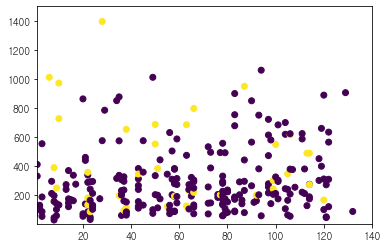

In [11]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.axis([1,140,1,1500])
axes1.scatter(
    x=Notice['old'],
    y=Notice['view'],
    c=Notice['money'])

# 오래된 것과 조회수 분포
# money로 하면 색이 money의 리턴값에 따라서 바뀐다.

(array([ 0.,  0.,  1.,  1.,  4.,  8.,  5.,  7., 11.,  6.,  8.,  7.,  6.,
         9.,  8.,  7.,  7.,  8.,  6.,  8., 10.,  7.,  3., 10.,  5.,  3.,
         2.,  9.,  2., 10.,  7.,  4.,  3.,  6.,  3.,  2.,  1.,  4.,  6.,
         1.,  0.,  1.,  0.,  1.,  2.,  2.,  0.,  2.,  2.,  3.,  1.,  0.,
         0.,  1.,  1.,  3.,  2.,  4.,  2.,  0.,  0.,  3.,  2.,  2.,  0.,
         2.,  0.,  1.,  3.,  1.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
        520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
        650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
 

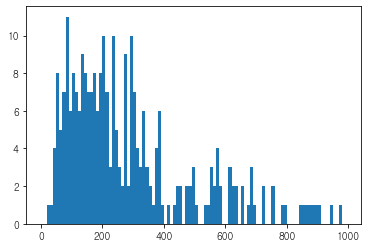

In [12]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.hist(Notice['view'],bins=list(range(0,1000,10)))

# 해당 조회수의 게시글이 몇 개가 있는지 체크

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Notice_train= Notice[["work","old","seminar","money","competition","view"]]
train, test = train_test_split(Notice_train, test_size=0.2)

In [16]:
model= LinearRegression()
train_y = train['view']
train_x = train.iloc[:,:-1]
model.fit(train_x, train_y)
test_y = test['view']
test_x = test.iloc[:,:-1]
predict = model.predict(test_x)

2563609.5820184653


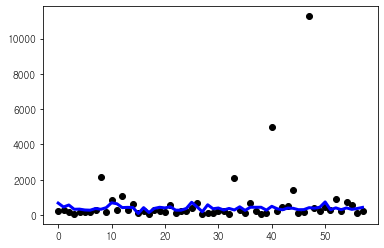

In [19]:
plt.scatter(list(range(len(test_y))), test_y, color='black')
plt.plot(list(range(len(test_y))), predict, color='blue', linewidth=3)
#선형회귀 결과 그래프

print(mean_squared_error(test_y, predict))

In [ ]:
#4개의 요소 전부가 view에 영향을 준다는 것은 알 수 있지만, 선형 회귀를 사용한 모델로 정확하게 조회수를 예측하기 위해선
#데이터와 모델의 조정이 필요할 것으로 보인다.